# Assignment 3 on Natural Language Processing

## Date : 30th Sept, 2020

### Instructor : Prof. Sudeshna Sarkar

### Teaching Assistants : Alapan Kuila, Aniruddha Roy, Anusha Potnuru, Uppada Vishnu

The central idea of this assignment is to use Naive Bayes classifier and LSTM based classifier and compare the models by accuracy on IMDB dataset.



Please submit with outputs. 

In [1]:
import re
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import keras
from sklearn.metrics import classification_report
import math

In [2]:
import csv
#Load the IMDB dataset. You can load it using pandas as dataframe
data = pd.read_csv('IMDB Dataset.csv', usecols = range(2), quotechar="\"", delimiter = ',', header = None, error_bad_lines=False, encoding='utf-8')
data.drop(0, axis = 0, inplace = True)
data = data.rename(columns={0: "Review", 1: 'Sentiment'})
data.dropna(subset = ['Sentiment'], inplace=True)
print(data)

                                                  Review Sentiment
1      One of the other reviewers has mentioned that ...  positive
2      A wonderful little production. <br /><br />The...  positive
3      I thought this was a wonderful way to spend ti...  positive
4      Basically there's a family where a little boy ...  negative
5      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49996  I thought this movie did a down right good job...  positive
49997  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49998  I am a Catholic taught in parochial elementary...  negative
49999  I'm going to have to disagree with the previou...  negative
50000  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


# Preprocessing
PrePrecessing that needs to be done on lower cased corpus

1. Remove html tags
2. Remove URLS
3. Remove non alphanumeric character
4. Remove Stopwords
5. Perform stemming and lemmatization

You can use regex from re. 

In [3]:
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
from nltk.stem import PorterStemmer
ps = PorterStemmer()
import re

def preprocess(raw):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', raw)
    cleantext = re.sub(r'^https?:\/\/.*[\r\n]*', '', cleantext, flags=re.MULTILINE)
    cleantext = cleantext.lower()
    cleantext = re.sub('\'', '', cleantext, flags = re.MULTILINE)
    PERMITTED_CHARS = "0123456789abcdefghijklmnopqrstuvwxyz " 
    cleantext = "".join(c for c in cleantext if c in PERMITTED_CHARS)
    words = nltk.word_tokenize(cleantext)
    new = ' '.join(ps.stem(w) for w in words if w not in stop)
    return new

i=1
for review in data['Review']:
    data.at[i, 'Review'] = preprocess(review)
    i = i+1
    
data

,Review,Sentiment
1,one review mention watch 1 oz episod youll hoo...,positive
2,wonder littl product film techniqu unassum old...,positive
3,thought wonder way spend time hot summer weeke...,positive
4,basic there famili littl boy jake think there ...,negative
5,petter mattei love time money visual stun film...,positive
...,...,...
49996,thought movi right good job wasnt creativ orig...,positive
49997,bad plot bad dialogu bad act idiot direct anno...,negative
49998,cathol taught parochi elementari school nun ta...,negative
49999,im go disagre previou comment side maltin one ...,negative


Average length of a sentence = 119.77189543790875


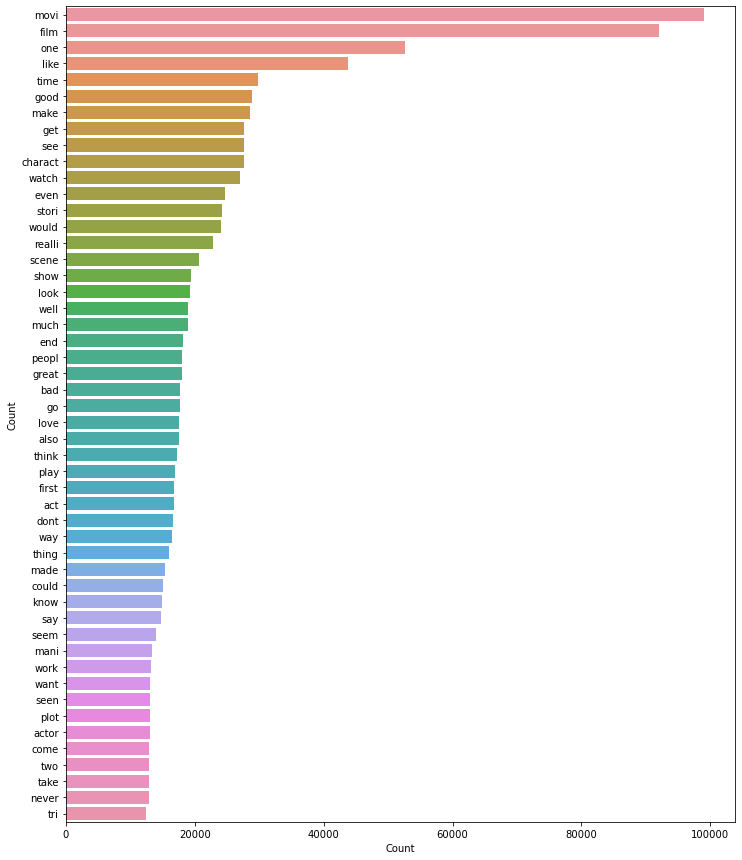

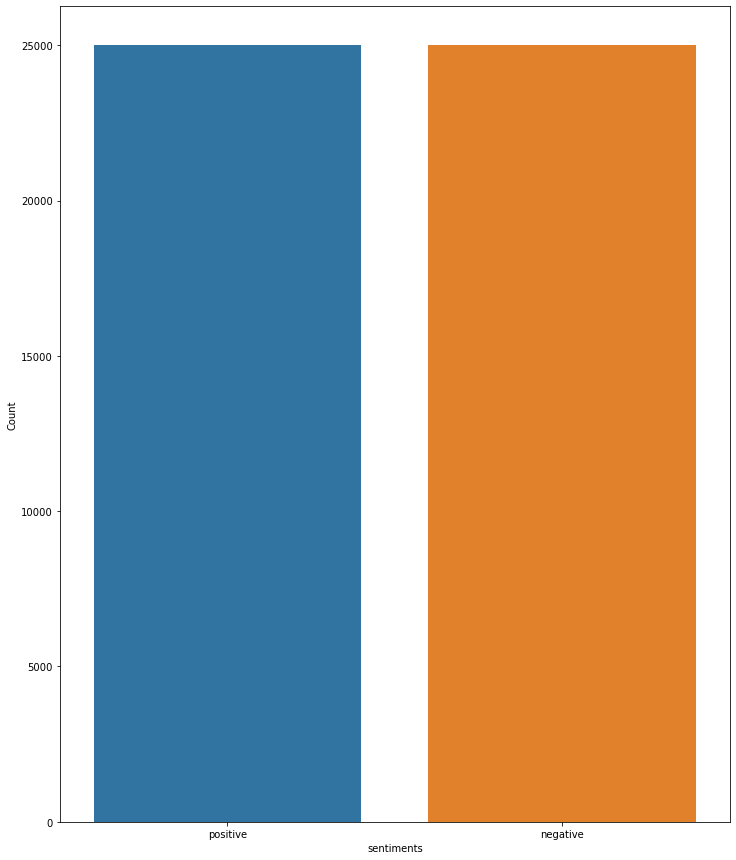

In [4]:
# Print Statistics of Data like avg length of sentence , proposition of data w.r.t class labels
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
num_words = []
words = []
for review in data['Review']:
    temp = nltk.sent_tokenize(review)
    for sent in temp:
        num_words.append(len(nltk.word_tokenize(sent)))

for review in data['Review']:
    temp3 = nltk.word_tokenize(review)
    for word in temp3:
        words.append(word)

print('Average length of a sentence = ' + str(np.mean(num_words)))

fdist = nltk.FreqDist(words)
fdist_df = pd.DataFrame({'words': list(fdist.keys()), 
                              'Count': list(fdist.values())})
g = fdist_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "words") 
ax.set(ylabel = 'Count') 
plt.show()

fdist_sentiment = nltk.FreqDist(data['Sentiment'])
fdist_s_df = pd.DataFrame({'sentiments': list(fdist_sentiment.keys()), 'Count': list(fdist_sentiment.values())})
g2 = fdist_s_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g2, y= "Count", x = "sentiments") 
ax.set(ylabel = 'Count') 
plt.show()

# Naive Bayes classifier

In [5]:
# get reviews column from df
reviews = data['Review']

# get labels column from df
labels_old = data['Sentiment']

In [6]:
# Use label encoder to encode labels. Convert to 0/1
print(labels_old)
encoder = LabelEncoder()
labels = encoder.fit_transform(labels_old.astype(str))

# print(enc.classes_)
print(np.unique(labels))
print(labels)

1        positive
2        positive
3        positive
4        negative
5        positive
           ...   
49996    positive
49997    negative
49998    negative
49999    negative
50000    negative
Name: Sentiment, Length: 50000, dtype: object
[0 1]
[1 1 1 ... 0 0 0]


In [7]:
# Split the data into train and test (80% - 20%). 
# Use stratify in train_test_split so that both train and test have similar ratio of positive and negative samples.
train_sentences, test_sentences, train_labels, test_labels = train_test_split(reviews, labels, stratify = labels, test_size = 0.2)
# train_sentences, test_sentences, train_labels, test_labels
train_sentences = np.array(train_sentences)
test_sentences = np.array(test_sentences)
print('\n***************** Training sentences *****************\n')
print(train_sentences)
print('\n***************** Test sentences *****************\n')
print(test_sentences)
print('\n***************** Training labels *****************\n')
print(train_labels)
print('\n***************** Test labels *****************\n')
print(test_labels)
print('\n*****************\n')


***************** Training sentences *****************

['forget lousi act forgiven sort film even terribl unnatur dialog illog event subtitl actual reflect said far wors blatant absenc skill experienc director mayb took holiday editor film made watch film feel complet date even though made 7 year ago comput viru portal afterlif lol dial internetconnect clucki ghost imag photoshop pictur look therei thati face zoom face oop sound break chop next scene scene sequenc poorli edit result dont flow youll watch girl find corps still hang knot one scene liter 10 second later see place appar unaffect smile go aboutapart mani problem movi term productionvalu also pain long repetit thu utterli boringi recommend shutter stead orient thai horror movi done well'
 'ah mcbain charact name immort forev ridicul simpson also alway person least remain name titl tremend entertain outrag violent earli 90 action flick direct cool dude brought us extermin star two ultim badass bmovi hero christoph walken mi

Here there are two approaches possible for building vocabulary for the naive Bayes.
1. Take the whole data (train + test) to build the vocab. In this way while testing there is no word which will be out of vocabulary.
2. Take the train data to build vocab. In this case, some words from the test set may not be in vocab and hence one needs to perform smoothing so that one the probability term is not zero.
 
You are supposed to go by the 2nd approach.
 
Also building vocab by taking all words in the train set is memory intensive, hence you are required to build vocab by choosing the top 2000 - 3000 frequent words in the training corpus.

> $ P(x_i | w_j) = \frac{ N_{x_i,w_j}\, +\, \alpha }{ N_{w_j}\, +\, \alpha*d} $


$N_{x_i,w_j}$ : Number of times feature $x_i$ appears in samples of class $w_j$

$N_{w_j}$ : Total count of features in class $w_j$

$\alpha$ : Parameter for additive smoothing. Here consider $\alpha$ = 1

$d$ : Dimentionality of the feature vector  $x = [x_1,x_2,...,x_d]$. In our case its the vocab size.






In [8]:
from sklearn.feature_extraction.text import CountVectorizer
# Use Count vectorizer to get frequency of the words

pos_train = []
neg_train = []
all_words_pos = []
all_words_neg = []
all_words = []

for i in range(len(train_labels)):
    if train_labels[i]==1:
        pos_train.append(train_sentences[i])
    else:
        neg_train.append(train_sentences[i])
        
for review in pos_train:
    temp4 = nltk.word_tokenize(review)
    for word in temp4:
        all_words_pos.append(word)
        all_words.append(word)
        
vec_pos = CountVectorizer(all_words_pos, max_features = 3000)
X = vec_pos.fit_transform(all_words_pos)
pos_vocab = vec_pos.vocabulary_

for review in neg_train:
    temp5 = nltk.word_tokenize(review)
    for word in temp5:
        all_words_neg.append(word)
        all_words.append(word)
        
vec_neg = CountVectorizer(all_words_neg, max_features = 3000)
Y = vec_neg.fit_transform(all_words_neg)
neg_vocab = vec_neg.vocabulary_

vec_all = CountVectorizer(all_words, max_features = 3000)
Z = vec_all.fit_transform(all_words)
all_vocab = vec_all.vocabulary_.keys()

'''max_features parameter : If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.'''

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



'max_features parameter : If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.'

In [9]:
# Use laplace smoothing for words in test set not present in vocab of train set
def smoothing(word, sentiment, alpha = 1):
    if sentiment == 1:
        if word in all_vocab and word in pos_vocab.keys():
            count_word = pos_vocab[word]
        else:
            count_word = 0
        prob_word = (count_word + alpha)/(sum(list(pos_vocab.values())) + alpha * len(all_vocab))
    else:
        if word in all_vocab and word in neg_vocab.keys():
            count_word = neg_vocab[word]
        else:
            count_word = 0
        prob_word = (count_word + alpha)/(sum(list(neg_vocab.values())) + alpha * len(all_vocab))
    return math.log(prob_word)

In [10]:
# Build the model. Don't use the model from sklearn
def Trainer(old_review):
    review = preprocess(old_review)
    words = nltk.word_tokenize(review)
    total_prob_0 = 0
    total_prob_1 = 0
    for word in words:
        total_prob_0 = total_prob_0 + smoothing(word, 0)
        total_prob_1 = total_prob_1 + smoothing(word, 1)
    if total_prob_1 > total_prob_0:
        sentiment=1
    else:
        sentiment=0
    return sentiment

In [11]:
%%time
# Test the model on test set and report Accuracy
pred = []
for review in test_sentences:
    pred.append(Trainer(review))
pred = np.array(pred)
count_true=0    
for i in range(len(test_labels)):
    if pred[i]==test_labels[i]:
        count_true = count_true + 1
print(pred)
print(test_labels)
print('Accuracy on test set = ' + str(count_true/len(test_labels)))
print(classification_report(test_labels, pred))

[1 1 0 ... 0 1 0]
[1 1 1 ... 0 1 0]
Accuracy on test set = 0.6751
              precision    recall  f1-score   support

           0       0.68      0.65      0.67      5000
           1       0.67      0.70      0.68      5000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.67     10000
weighted avg       0.68      0.68      0.67     10000

Wall time: 5min 7s


# *LSTM* based Classifier

Use the above train and test splits.

In [12]:
# Hyperparameters of the model
vocab_size = 3000 # choose based on statistics
oov_tok = '<OOK>'
embedding_dim = 100
max_length = 120 # choose based on statistics, for example 150 to 200
padding_type='post'
trunc_type='post'

In [13]:
# tokenize sentences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

# convert train dataset to sequence and pad sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)

# convert Test dataset to sequence and pad sequences
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)

In [14]:
# model initialization
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 100)          300000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               84480     
_________________________________________________________________
dense (Dense)                (None, 24)                3096      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 387,601
Trainable params: 387,601
Non-trainable params: 0
_________________________________________________________________


In [15]:
num_epochs = 5
history = model.fit(train_padded, train_labels, 
                    epochs=num_epochs, verbose=1, 
                    validation_split=0.1)

Epoch 1/5
1125/1125 [==============================] - 16s 14ms/step - loss: 0.3877 - accuracy: 0.8238 - val_loss: 0.3259 - val_accuracy: 0.8540
Epoch 2/5
1125/1125 [==============================] - 15s 14ms/step - loss: 0.2782 - accuracy: 0.8845 - val_loss: 0.3148 - val_accuracy: 0.8645
Epoch 3/5
1125/1125 [==============================] - 15s 14ms/step - loss: 0.2367 - accuracy: 0.9054 - val_loss: 0.3357 - val_accuracy: 0.8605
Epoch 4/5
1125/1125 [==============================] - 15s 14ms/step - loss: 0.1968 - accuracy: 0.9226 - val_loss: 0.3804 - val_accuracy: 0.8575
Epoch 5/5
1125/1125 [==============================] - 15s 14ms/step - loss: 0.1606 - accuracy: 0.9379 - val_loss: 0.3893 - val_accuracy: 0.8413


In [16]:
# Calculate accuracy on Test data

prediction = model.predict(test_padded)

# Get probabilities
pred = []
for p in prediction:
    if p<0.5:
        pred.append(0)
    else:
        pred.append(1)
        
# Get labels based on probability 1 if p>= 0.5 else 0
print(classification_report(test_labels, pred))

# Accuracy : one can use classification_report from sklearn

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      5000
           1       0.86      0.86      0.86      5000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



## Get predictions for random examples

In [17]:
# reviews on which we need to predict
sentence = ["The movie was very touching and heart whelming", 
            "I have never seen a terrible movie like this", 
            "the movie plot is terrible but it had good acting"]

# convert to a sequence
sequences = tokenizer.texts_to_sequences(sentence)

# pad the sequence
padded = pad_sequences(sequences, padding='post', maxlen=max_length)

# Get probabilities
model.predict(padded)

# Get labels based on probability 1 if p>= 0.5 else 0

pred_new = []
for p in model.predict(padded):
    if p<0.5:
        pred_new.append(0)
    else:
        pred_new.append(1)
        
print(pred_new)

[1, 1, 0]
